<a href="https://colab.research.google.com/github/FariaParvinMegha/thesis_1/blob/main/Kidney_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import glob
import matplotlib.pyplot as plt

In [6]:
path = "/content/drive/MyDrive/kidney"

In [7]:
!pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio(
    "/content/drive/MyDrive/kidney",
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 12466 files [03:40, 56.66 files/s] 


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.2,
    vertical_flip=True,
    horizontal_flip = True,
    fill_mode="reflect")


train_generator = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,)

val_datagen = ImageDataGenerator(rescale = 1/255.0)


val_generator = train_datagen.flow_from_directory(
     './dataset/val',
    target_size=(224, 224),
     class_mode='categorical',
    batch_size = 64,)

Found 9971 images belonging to 4 classes.
Found 1244 images belonging to 4 classes.


In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model

In [11]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [12]:
given_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [13]:
for layer in given_model.layers:
    layer.trainable = False

In [14]:
top_model = Flatten()(given_model.output)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dropout(0.1)(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.05)(top_model)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.05)(top_model)
top_model = Dense(4, activation='softmax')(top_model)

In [15]:
model = Model(inputs=given_model.input, outputs=top_model)

In [16]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator)

Epoch 1/20
156/156 [==============================] - 227s 1s/step - loss: 2.3921 - accuracy: 0.5818 - val_loss: 0.6103 - val_accuracy: 0.7685
Epoch 2/20
156/156 [==============================] - 184s 1s/step - loss: 0.7135 - accuracy: 0.7253 - val_loss: 0.5564 - val_accuracy: 0.8063
Epoch 3/20
156/156 [==============================] - 189s 1s/step - loss: 0.5707 - accuracy: 0.7807 - val_loss: 0.4387 - val_accuracy: 0.8392
Epoch 4/20
156/156 [==============================] - 185s 1s/step - loss: 0.5221 - accuracy: 0.7988 - val_loss: 0.4731 - val_accuracy: 0.8312
Epoch 5/20
156/156 [==============================] - 183s 1s/step - loss: 0.4438 - accuracy: 0.8320 - val_loss: 0.3703 - val_accuracy: 0.8553
Epoch 6/20
156/156 [==============================] - 183s 1s/step - loss: 0.3899 - accuracy: 0.8544 - val_loss: 0.3371 - val_accuracy: 0.8706
Epoch 7/20
156/156 [==============================] - 181s 1s/step - loss: 0.3556 - accuracy: 0.8659 - val_loss: 0.2786 - val_accuracy: 0.8995

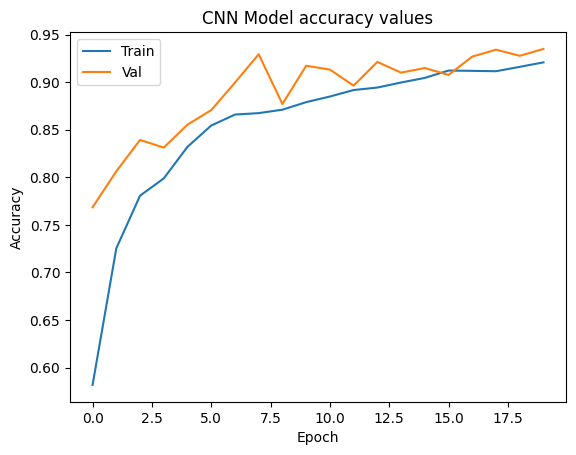

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

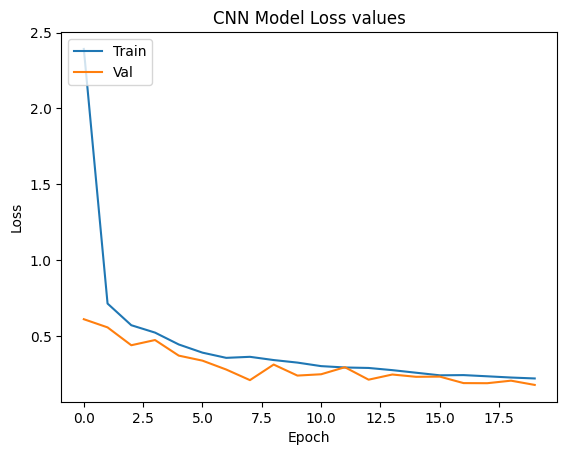

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)


test_generator = train_datagen.flow_from_directory(
     './dataset/test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,shuffle = False)

Found 1251 images belonging to 4 classes.


In [31]:
pred = model.predict_generator(test_generator)

<ipython-input-31-f79076686fd5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator)


In [32]:
model.evaluate_generator(test_generator)

<ipython-input-32-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.20789605379104614, 0.9304556250572205]

In [33]:
y_pred = np.argmax(pred, axis = 1)
y_pred

array([0, 0, 0, ..., 1, 3, 3])

In [34]:
y_true = test_generator.classes

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[366,   2,   4,   1],
       [  8, 487,   8,   7],
       [ 29,   4, 106,   0],
       [ 20,   7,   1, 201]])

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       373
           1       0.97      0.95      0.96       510
           2       0.89      0.76      0.82       139
           3       0.96      0.88      0.92       229

    accuracy                           0.93      1251
   macro avg       0.92      0.89      0.91      1251
weighted avg       0.93      0.93      0.93      1251

